In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from utils.paths import DATA_RAW_DIR


In [2]:
path_partidos = str(DATA_RAW_DIR / 'partidos_cebollitas.csv')

print('Path:', path_partidos)
print('Does path exist?', Path(path_partidos).exists())

Path: /Users/jssdev/Dev/Learning/Platzi/platzi-machine-learning/data/raw/partidos_cebollitas.csv
Does path exist? True


In [3]:
df_partidos = pd.read_csv(path_partidos, sep=',', encoding='utf-8')
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


## Feature Engineering

#### Diferencia de goles (local - visitante)

In [4]:
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

df_partidos[['goles_local', 'goles_visitante', 'diferencia_goles']].head()

,goles_local,goles_visitante,diferencia_goles
0,2,0,2
1,1,5,-4
2,1,0,1
3,2,3,-1
4,5,3,2


#### Ratio de tiros al arco por porcentaje de posesion

In [6]:
df_partidos['ratio_tiros_posesion_local'] = df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']

In [7]:
df_partidos[['tiros_arco_local', 'posesion_local (%)', 'ratio_tiros_posesion_local']].head()

,tiros_arco_local,posesion_local (%),ratio_tiros_posesion_local
0,12,54,0.222222
1,12,60,0.200000
2,10,55,0.181818
3,3,57,0.052632
4,7,52,0.134615


In [8]:
df_partidos['ratio_tiros_posesion_local'].max()

0.2727272727272727

In [9]:
df_partidos['ratio_tiros_posesion_local'].describe()

count    100.000000
mean       0.152053
std        0.059408
min        0.050000
25%        0.100000
50%        0.149074
75%        0.200000
max        0.272727
Name: ratio_tiros_posesion_local, dtype: float64

### Histograma

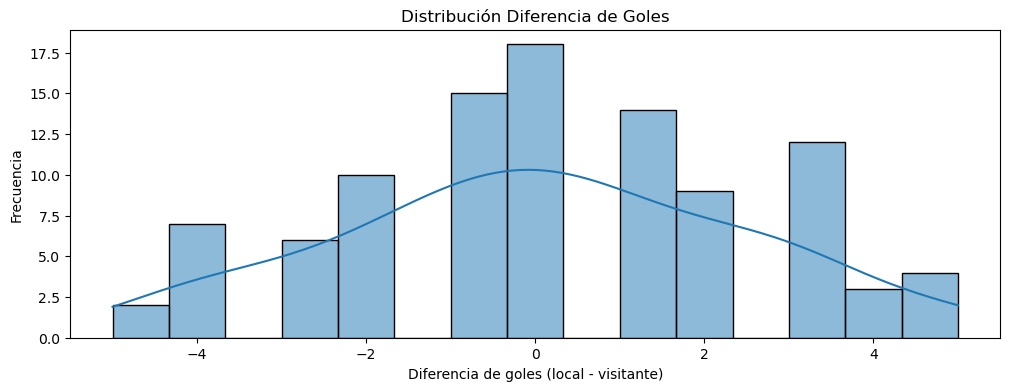

In [12]:
# Histograma de diferencia de goles
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.histplot(x=df_partidos['diferencia_goles'], bins=15, kde=True, ax=ax)
ax.set_title('Distribución Diferencia de Goles')
plt.xlabel('Diferencia de goles (local - visitante)')
plt.ylabel('Frecuencia')
plt.show()

#### Correlacion

In [13]:
corr_vars = ['goles_local', 'goles_visitante', 'diferencia_goles', 'ratio_tiros_posesion_local']

In [15]:
corr_matrix = df_partidos[corr_vars].corr()
corr_matrix

,goles_local,goles_visitante,diferencia_goles,ratio_tiros_posesion_local
goles_local,1.000000,-0.017861,0.671035,-0.152179
goles_visitante,-0.017861,1.000000,-0.753293,0.058957
diferencia_goles,0.671035,-0.753293,1.000000,-0.143821
ratio_tiros_posesion_local,-0.152179,0.058957,-0.143821,1.000000


#### Heatmap

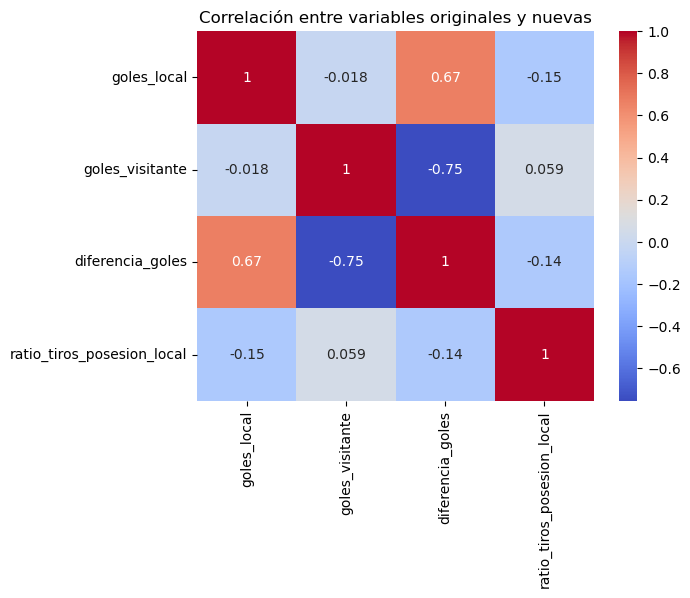

In [16]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables originales y nuevas')
plt.show()